In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df=pd.read_csv('indian_liver_patient.csv')

In [4]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


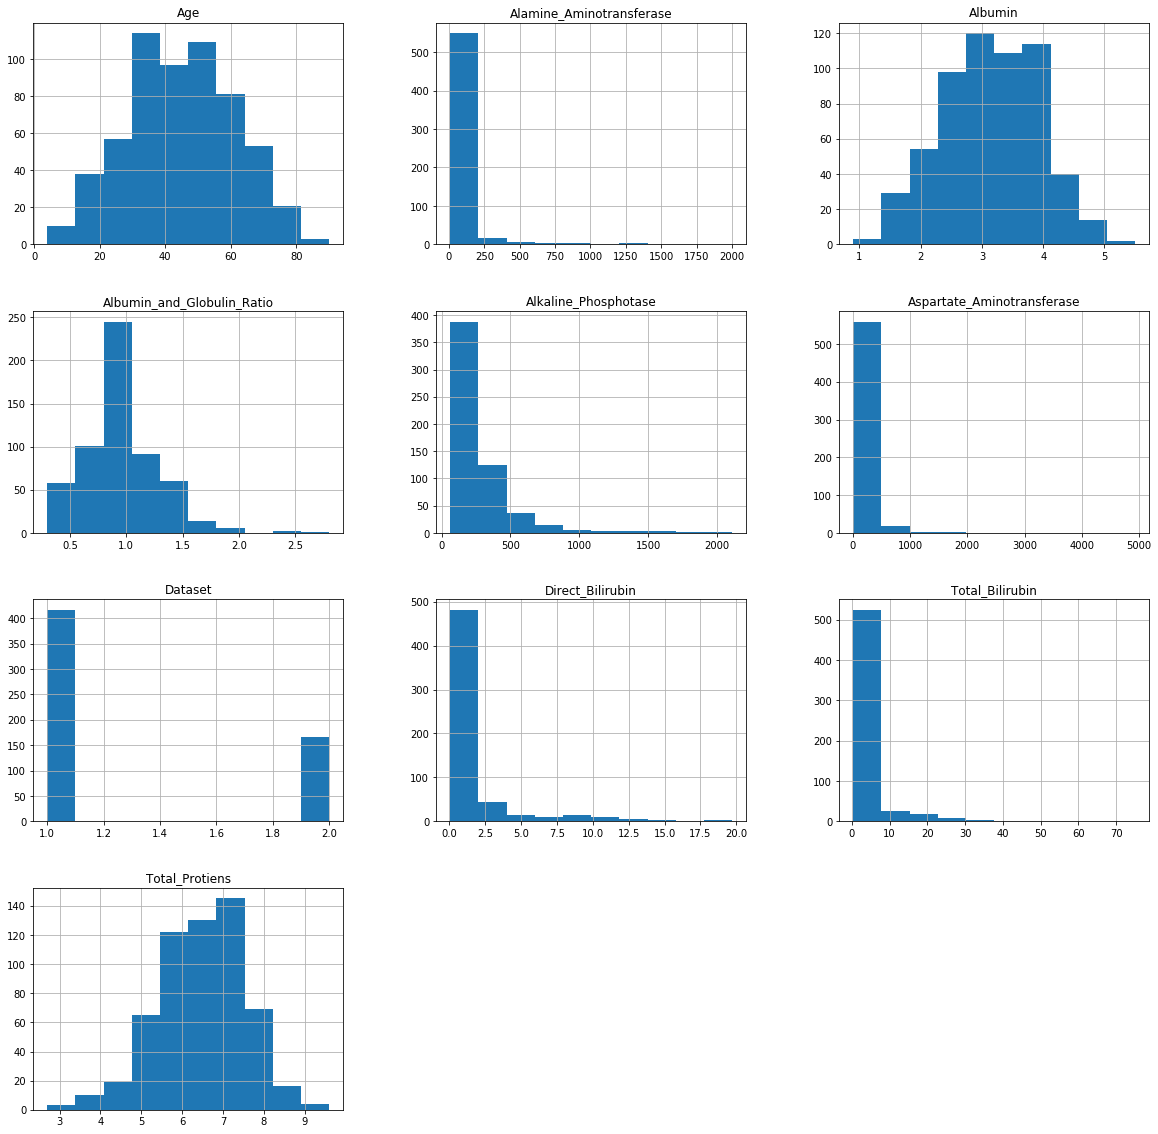

In [6]:
#We need to classify the person which are suffering from the liver disease:
# Plotting the distribution of numerical  categories
df.hist(figsize=(20,20));

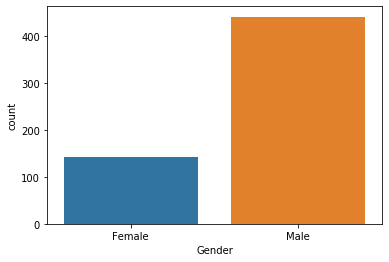

In [8]:
#There are more the 400 male and around 150 women in the dataset.
sns.countplot('Gender',data=df)

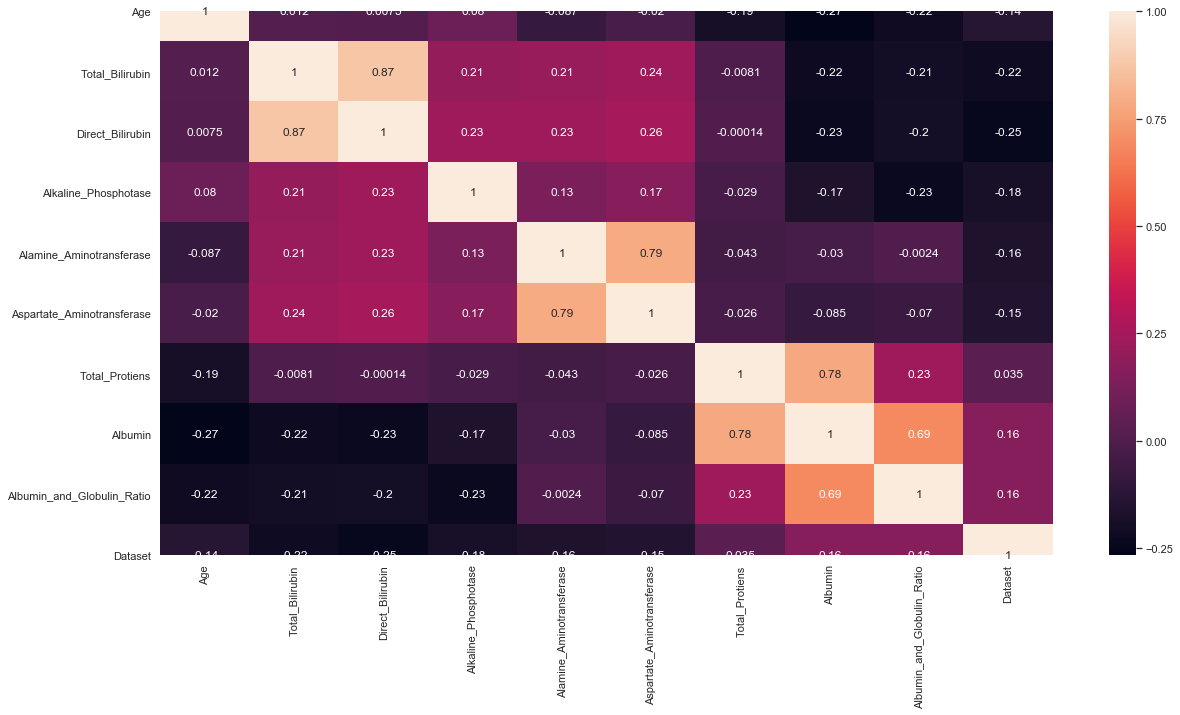

In [12]:
# Create a covariance matrix and plotting a heatmap to show linearity or non linearity between different columns:

plt.figure(figsize=(20,10))
corr = df.corr()
sns.set(font_scale=1)
heat_map = sns.heatmap(corr, annot=True)
plt.show()

In [13]:
#As we can see Direct_Bilirubin and Total_Bilirubin are highly correlated  so we can remove one of them

In [19]:
df.drop(['Direct_Bilirubin'],axis=1,inplace=True)

In [20]:
df['Gender']=pd.get_dummies(df['Gender'])

In [21]:
df.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,195,27,59,7.3,2.4,0.40,1


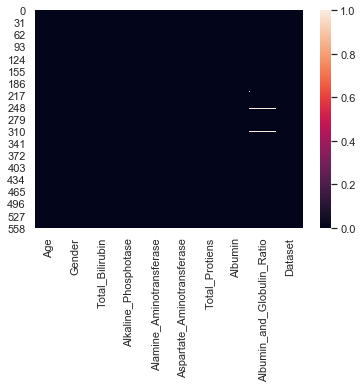

In [26]:
sns.heatmap(df.isnull())
#Now we can clearly see there are two nan values in Albumin_and_Globulin_Ratio we will try to fill them with median.


In [35]:
df.fillna(df.median(),inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
Age                           583 non-null int64
Gender                        583 non-null uint8
Total_Bilirubin               583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    583 non-null float64
Dataset                       583 non-null int64
dtypes: float64(4), int64(5), uint8(1)
memory usage: 41.7 KB


In [37]:
X=df.iloc[:,:-1]
Y=df['Dataset']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [39]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [40]:
Y_pred = classifier.predict(X_test)


In [44]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[78, 22],
       [24, 22]], dtype=int64)

In [51]:
print(classification_report(Y_test,Y_pred))


              precision    recall  f1-score   support

           1       0.76      0.78      0.77       100
           2       0.50      0.48      0.49        46

    accuracy                           0.68       146
   macro avg       0.63      0.63      0.63       146
weighted avg       0.68      0.68      0.68       146



In [54]:
#Now we will vary the max_number of features in our model:
scores = []
for i in range(1, len(X.columns) + 1):
    classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    classifier.fit(X_train, Y_train)
    scores.append(classifier.score(X_test, Y_test))

Text(0.5, 1.0, 'Decision Tree Classifier')

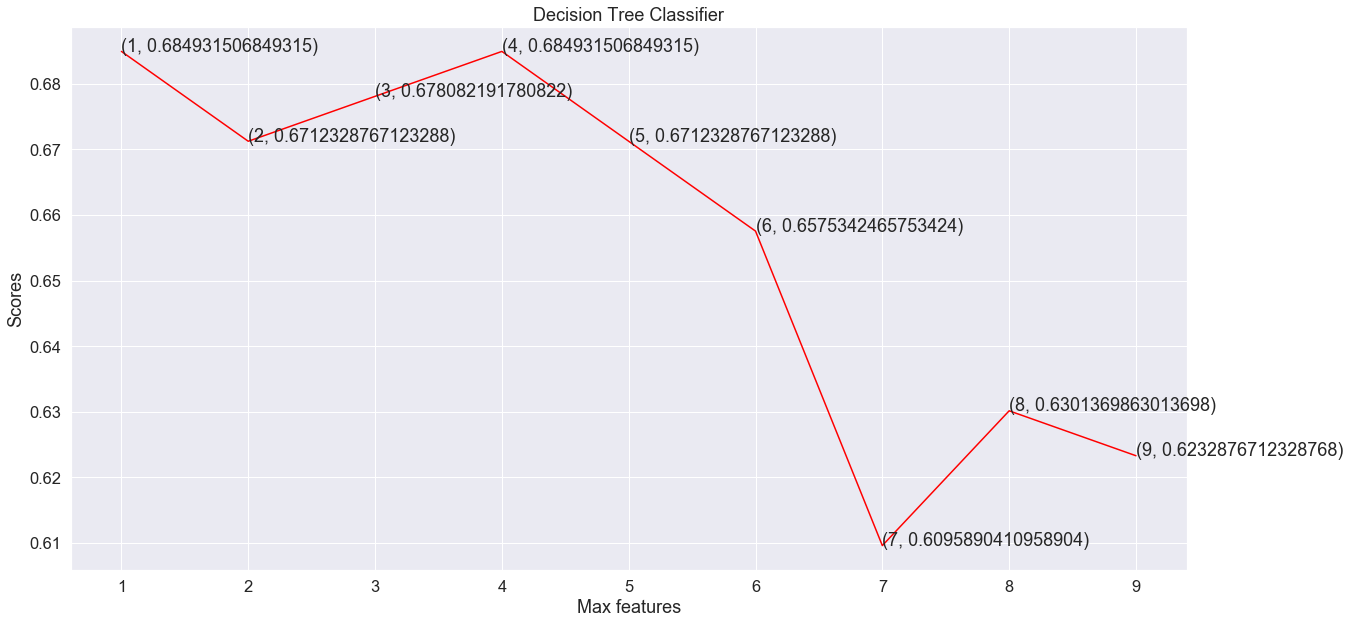

In [58]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5)
plt.plot([i for i in range(1, len(X.columns) + 1)], scores, color = 'red')
for i in range(1, len(X.columns) + 1):
    plt.text(i,scores[i-1], (i,scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier')

In [ ]:
#We can cleary see the score is max when max_feature is 1 or 4.